In [37]:
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Recommenders with NMF
### Non-negative Matrix factorization

### Idea
- We approximate (the missing values of) the matrix we need: user-rating matrix decomposing the information of the final matrix by *factorizing* it into two other ones that we can actually derive
- *factorizing*: decomposing a matrix into a product of two matrices
- *non-negative*: all of our matrices only allow positive values

### The Data
#### Matrix of Users:Ratings (Rtrue) 

In [2]:
movies = ['Titanic', 'Breakfast at Tiffanys', 'Terminator', 'Star Trek', 'Star Wars']
users = ['Ada', 'Bob', 'Steve', 'Margaret']
Rtrue = np.array([[5, 4, 1, 1, np.nan],
                  [3, 2, 1, np.nan, 1],
                  [np.nan, np.nan, np.nan, np.nan, 5],
                  [1, 1, 5, 4, 4]])

In [3]:
df = pd.DataFrame(Rtrue, index=users, columns=movies)
df

,Titanic,Breakfast at Tiffanys,Terminator,Star Trek,Star Wars
Ada,5.0,4.0,1.0,1.0,NaN
Bob,3.0,2.0,1.0,NaN,1.0
Steve,NaN,NaN,NaN,NaN,5.0
Margaret,1.0,1.0,5.0,4.0,4.0


#### More interesting data 

In [4]:
df = pd.read_csv('../data/cohort_rated_movies.csv', index_col= 'User', na_values = 'Nan')

In [5]:
df

,Forrest Gump,Shawshank Redemption,Pulp Fiction,Silence of the Lambs,"Matrix, The",Star Wars: Episode IV,Jurassic Park,Braveheart,Terminator 2,Toy Story,American Beauty,Dances with Wolves,Lord of The Rings Trilogy,Lion King
User,,,,,,,,,,,,,,
Ahmed,5,5.0,4.0,3.0,5,2.0,2,1.0,4.0,5.0,4.0,NaN,5,5
Jenny,5,4.0,5.0,NaN,2,1.0,5,5.0,4.0,5.0,4.0,4.0,3,5
Sima,5,5.0,5.0,5.0,3,2.0,2,1.0,5.0,5.0,4.0,NaN,5,2
Gülcin,5,5.0,5.0,5.0,4,5.0,3,2.0,2.0,NaN,5.0,NaN,4,3
Shea,4,5.0,5.0,5.0,4,2.0,3,3.0,4.0,3.0,4.0,2.0,3,3
Dalal,4,4.0,5.0,5.0,5,4.0,4,4.0,NaN,2.0,5.0,NaN,5,4
Maisam,5,NaN,5.0,5.0,4,2.0,2,2.0,3.0,5.0,5.0,4.0,4,4
Media,5,NaN,5.0,4.0,4,2.0,2,2.0,1.0,4.0,5.0,NaN,3,4
alex,5,5.0,4.0,4.0,5,NaN,3,3.0,2.0,3.0,4.0,4.0,4,3


The NMF algorithm in sklearn doesn't take missing values...
Other options that do take missing values: http://surpriselib.com/

### 0. How do we deal with missing values (Imputation)?
##### Ideas?
- Fill with mean or median (e.g. 2 or 3, 2.5) <- easy, quick, maybe good enough?
- Fill in with 0 <- would be interpreted as "person didn't like the movie", not such a good idea
- Fill missing values with more sophisticated algorith:
    - e.g. mean user rating for similar movie genre
    - KNN imputer (exists in sklearn): computational expensive

In [6]:
from sklearn.impute import SimpleImputer

In [7]:
imputer = SimpleImputer(strategy = 'constant', fill_value= 2.5) # add the NaN with the average of movie recommendations 

In [8]:
Rtrue = imputer.fit_transform(df)

In [9]:
Rtrue

array([[5. , 5. , 4. , 3. , 5. , 2. , 2. , 1. , 4. , 5. , 4. , 2.5, 5. ,
        5. ],
       [5. , 4. , 5. , 2.5, 2. , 1. , 5. , 5. , 4. , 5. , 4. , 4. , 3. ,
        5. ],
       [5. , 5. , 5. , 5. , 3. , 2. , 2. , 1. , 5. , 5. , 4. , 2.5, 5. ,
        2. ],
       [5. , 5. , 5. , 5. , 4. , 5. , 3. , 2. , 2. , 2.5, 5. , 2.5, 4. ,
        3. ],
       [4. , 5. , 5. , 5. , 4. , 2. , 3. , 3. , 4. , 3. , 4. , 2. , 3. ,
        3. ],
       [4. , 4. , 5. , 5. , 5. , 4. , 4. , 4. , 2.5, 2. , 5. , 2.5, 5. ,
        4. ],
       [5. , 2.5, 5. , 5. , 4. , 2. , 2. , 2. , 3. , 5. , 5. , 4. , 4. ,
        4. ],
       [5. , 2.5, 5. , 4. , 4. , 2. , 2. , 2. , 1. , 4. , 5. , 2.5, 3. ,
        4. ],
       [5. , 5. , 4. , 4. , 5. , 2.5, 3. , 3. , 2. , 3. , 4. , 4. , 4. ,
        3. ],
       [5. , 5. , 5. , 5. , 5. , 3. , 2. , 5. , 4. , 3. , 5. , 5. , 4. ,
        2. ],
       [4. , 4. , 5. , 3. , 3. , 3. , 3. , 3. , 3. , 3. , 5. , 4. , 3. ,
        2. ],
       [5. , 2.5, 2.5, 3. , 4. , 3. , 3. , 

### 1. Create a model 
Model assumes R ~ PQ'

In [10]:
from sklearn.decomposition import NMF

In [11]:
model = NMF(n_components=2, max_iter= 500)  # n_components is the number of features selected. Frot eh example in the class the n_components is 2

- Components (# of hidden feutures, in our example 'genres'):
    * Small `n_components` = trains fast, might underfit
    * High `n_components` = trains slow, might overfit

In [12]:
model.fit(Rtrue)

NMF(max_iter=500, n_components=2)

### 2. Get matrices **Q** and **P**
- `Q`: `model.components_`
- `P`: `model.transform(RTrue)`

#### Q: Movie-'genre' matrix

In [14]:
Q = model.components_
Q

array([[2.40259333, 1.80556095, 2.40321663, 2.28225363, 2.00880412,
        1.18967184, 0.93186721, 0.70943103, 1.35683415, 2.04486642,
        2.05216336, 1.18256902, 1.84890585, 1.82232328],
       [0.84224856, 1.26686401, 0.5586944 , 0.29326581, 0.48971819,
        0.71945087, 1.46665666, 2.13516283, 1.1636387 , 0.        ,
        1.04752169, 1.52243799, 0.83959585, 0.38246249]])

In [15]:
Q_df = pd.DataFrame(model.components_, columns=df.columns, index=['feature1', 'feature2'])
Q_df

,Forrest Gump,Shawshank Redemption,Pulp Fiction,Silence of the Lambs,"Matrix, The",Star Wars: Episode IV,Jurassic Park,Braveheart,Terminator 2,Toy Story,American Beauty,Dances with Wolves,Lord of The Rings Trilogy,Lion King
feature1,2.402593,1.805561,2.403217,2.282254,2.008804,1.189672,0.931867,0.709431,1.356834,2.044866,2.052163,1.182569,1.848906,1.822323
feature2,0.842249,1.266864,0.558694,0.293266,0.489718,0.719451,1.466657,2.135163,1.163639,0.000000,1.047522,1.522438,0.839596,0.382462


In [16]:
import seaborn as sns

<AxesSubplot:>

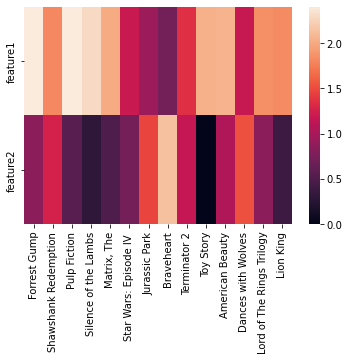

In [17]:
sns.heatmap(Q_df)

#### P: User-'genre' matrix

In [18]:
P = model.transform(Rtrue)
P

array([[2.12298199, 0.08972389],
       [1.39640881, 1.61991708],
       [2.06256886, 0.17321335],
       [1.89023925, 0.59048493],
       [1.68817603, 0.75610248],
       [1.71879313, 1.12395843],
       [2.09115564, 0.16364906],
       [1.92341529, 0.        ],
       [1.64281012, 0.96184685],
       [1.63108874, 1.51568217],
       [1.3788372 , 1.18300073],
       [1.4555912 , 0.70533256],
       [1.58886182, 0.29136436],
       [1.11855283, 2.29305921]])

In [19]:
P_df = pd.DataFrame(P, columns=['feature1', 'feature2'], index=df.index)
P_df

,feature1,feature2
User,,
Ahmed,2.122982,0.089724
Jenny,1.396409,1.619917
Sima,2.062569,0.173213
Gülcin,1.890239,0.590485
Shea,1.688176,0.756102
Dalal,1.718793,1.123958
Maisam,2.091156,0.163649
Media,1.923415,0.000000
alex,1.642810,0.961847


<AxesSubplot:ylabel='User'>

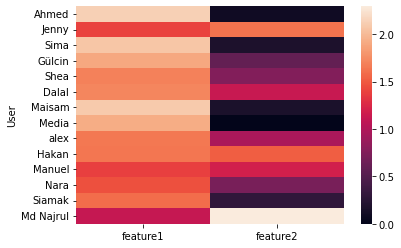

In [20]:
sns.heatmap(P_df)

In [21]:
model.reconstruction_err_

11.284235841363476

/opt/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1077: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


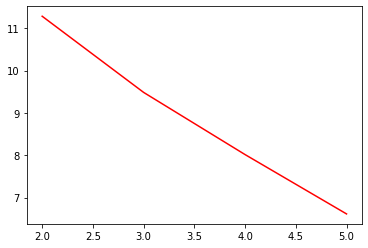

[11.284235841363476, 9.485263579664041, 8.016096876697228, 6.614438572893025]


In [78]:
from sklearn.decomposition import NMF
import seaborn as sns
error = []
for i in np.arange(2,6):
    model = NMF(n_components=i, max_iter= 500)  # n_components is the number of features selected. Frot eh example in the class the n_components is 2
    model.fit(Rtrue)
    Q = model.components_
    Q_df = pd.DataFrame(model.components_, columns=df.columns)
    P = model.transform(Rtrue)
    P_df = pd.DataFrame(P,  index=df.index)
    error.append(model.reconstruction_err_)
error
x = np.arange(2, 6)
plt.plot(x, error, color ="red")
plt.show()
print(error)

<AxesSubplot:ylabel='User'>

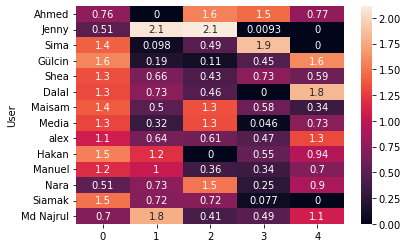

In [79]:
sns.heatmap(P_df,annot = True)

#### (Reconstruct predicted R) <- not necessary for predictions

In [46]:
R = pd.DataFrame(np.dot(P, Q).round(), index=df.index, columns=df.columns)

In [47]:
R

,Forrest Gump,Shawshank Redemption,Pulp Fiction,Silence of the Lambs,"Matrix, The",Star Wars: Episode IV,Jurassic Park,Braveheart,Terminator 2,Toy Story,American Beauty,Dances with Wolves,Lord of The Rings Trilogy,Lion King
User,,,,,,,,,,,,,,
Ahmed,5.0,4.0,5.0,5.0,4.0,3.0,2.0,2.0,3.0,4.0,4.0,3.0,4.0,4.0
Jenny,5.0,5.0,4.0,4.0,4.0,3.0,4.0,4.0,4.0,3.0,5.0,4.0,4.0,3.0
Sima,5.0,4.0,5.0,5.0,4.0,3.0,2.0,2.0,3.0,4.0,4.0,3.0,4.0,4.0
Gülcin,5.0,4.0,5.0,4.0,4.0,3.0,3.0,3.0,3.0,4.0,4.0,3.0,4.0,4.0
Shea,5.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,4.0,3.0
Dalal,5.0,5.0,5.0,4.0,4.0,3.0,3.0,4.0,4.0,4.0,5.0,4.0,4.0,4.0
Maisam,5.0,4.0,5.0,5.0,4.0,3.0,2.0,2.0,3.0,4.0,4.0,3.0,4.0,4.0
Media,5.0,3.0,5.0,4.0,4.0,2.0,2.0,1.0,3.0,4.0,4.0,2.0,4.0,4.0
alex,5.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,4.0,3.0


### 3. Predict i.e recommend

In [48]:
df.columns

Index(['Forrest Gump', 'Shawshank Redemption', 'Pulp Fiction',
       'Silence of the Lambs', 'Matrix, The', 'Star Wars: Episode IV ',
       'Jurassic Park', 'Braveheart', 'Terminator 2', 'Toy Story',
       'American Beauty', 'Dances with Wolves', 'Lord of The Rings Trilogy',
       'Lion King'],
      dtype='object')

#### Get new ratings

In [49]:
df.loc[df.index == 'Nara',:].values

array([[ 5., nan, nan,  3.,  4.,  3.,  3.,  3.,  3.,  4., nan, nan,  3.,
         4.]])

In [50]:
user = df.loc[df.index == 'Nara',:].values

In [53]:
user

array([[ 5., nan, nan,  3.,  4.,  3.,  3.,  3.,  3.,  4., nan, nan,  3.,
         4.]])

#### Impute

In [54]:
user_clean = imputer.transform(user)

In [55]:
user_clean

array([[5. , 2.5, 2.5, 3. , 4. , 3. , 3. , 3. , 3. , 4. , 2.5, 2.5, 3. ,
        4. ]])

#### Predict user P

In [56]:
user_P = model.transform(user_clean)          # how strongly our user likes the 2 "genres"
user_P

array([[1.4555912 , 0.70533256]])

#### User R

In [57]:
#new user R - reconstruct R but for this new user only
user_R = np.dot(user_P,Q)

In [59]:
user_R[0]

array([4.09125904, 3.52171905, 3.89216632, 3.52887822, 3.26941178,
       2.23912797, 2.39089839, 2.53864142, 2.7957481 , 2.97648956,
       3.72596207, 2.79516214, 3.28344536, 2.92232097])

#### Remove movies user has already seen & give out recommendation

In [60]:
user[0]

array([ 5., nan, nan,  3.,  4.,  3.,  3.,  3.,  3.,  4., nan, nan,  3.,
        4.])

In [61]:
recommendation = pd.DataFrame({'user_input':user[0], 'predicted_ratings':user_R[0]}, index = df.columns)

In [62]:
recommendation

,user_input,predicted_ratings
Forrest Gump,5.0,4.091259
Shawshank Redemption,NaN,3.521719
Pulp Fiction,NaN,3.892166
Silence of the Lambs,3.0,3.528878
"Matrix, The",4.0,3.269412
Star Wars: Episode IV,3.0,2.239128
Jurassic Park,3.0,2.390898
Braveheart,3.0,2.538641
Terminator 2,3.0,2.795748
Toy Story,4.0,2.976490


In [63]:
recommendation[recommendation['user_input'].isna()].sort_values(by = 'predicted_ratings', ascending= False)

,user_input,predicted_ratings
Pulp Fiction,NaN,3.892166
American Beauty,NaN,3.725962
Shawshank Redemption,NaN,3.521719
Dances with Wolves,NaN,2.795162


In [64]:
recommendation[recommendation['user_input'].isna()].sort_values(by = 'predicted_ratings', ascending= False).head(1)

,user_input,predicted_ratings
Pulp Fiction,NaN,3.892166


## To use this for our project we need 
1. The user-ratings matrix
Use `pivot` `R = ratings.pivot(index = '___' ,columns = '___', values = '___')`
2. Follow the same steps in this notebook
3. Make it nicer, out it in a function

### The real use for our recommender

1. New user gives a dictionary of 3-5 movie:ratings 
    - "Movie title - rating form in your website" 
2. We recostruct the `new_user` and fill in with Nan everything that are not the movies mentioned
    - --> There will be a lot (A LOT, almost 10 000 `Nan`) 
3. Use the model as described in the notebook to give a recommendation

#### Helper functions for every recommender
- `def`: has the user watched the movie
- `def`: matching title with `fuzzywuzzy`

In [67]:
movies = pd.read_csv('../data/movies_genres.csv')

In [68]:
movies[movies['title'] == 'Matrix, The']

,movieid,title,year,romance,sci-fi,animation,film-noir,musical,adventure,thriller,...,fantasy,mystery,children,comedy,crime,western,imax,war,drama,action
1939,2571,"Matrix, The",1999.0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [69]:
movies[movies['title'] == 'The Matrix']

,movieid,title,year,romance,sci-fi,animation,film-noir,musical,adventure,thriller,...,fantasy,mystery,children,comedy,crime,western,imax,war,drama,action


Solve the problem of users not writing the extact title with `fuzzywuzzy`:https://github.com/seatgeek/fuzzywuzzy

In [70]:
#!pip install fuzzywuzzy

In [71]:
from fuzzywuzzy import process

/opt/anaconda3/lib/python3.7/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [72]:
movies['title']

0                                Toy Story
1                                  Jumanji
2                         Grumpier Old Men
3                        Waiting to Exhale
4              Father of the Bride Part II
                       ...                
9737    Black Butler: Book of the Atlantic
9738                 No Game No Life: Zero
9739                                 Flint
9740          Bungo Stray Dogs: Dead Apple
9741          Andrew Dice Clay: Dice Rules
Name: title, Length: 9742, dtype: object

In [73]:
process.extractOne('The Matrix', movies['title'])

('Matrix, The', 95, 1939)

In [74]:
process.extract('Shawshank Redemption', movies['title'])

[('Shawshank Redemption, The', 95, 277),
 ('Red', 90, 7445),
 ('Shane', 72, 2894),
 ('Demolition', 70, 9062),
 ('Jaws', 68, 1067)]